<a href="https://colab.research.google.com/github/Desmador/radixsort/blob/main/Homework_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Setup and EDA Preparations

In [211]:
#import modules
import seaborn as sns
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
from datetime import datetime

#need to loop over files in google drive
import os
import glob

#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Setup Dataset

In [212]:
#path to the data/csv files in google drive
path = r"drive/My Drive/31-M29/HW2 Data/*.csv"
csv_files = glob.glob(path)

#use same column names and setup empty dict for the dataset
dataset = {}
column_names = ['timestamp', 'grugatrasse_ruettenscheid_west', 'grugatrasse_ruhr_ost', 'huyssenallee_ruettenscheid_sued', 'huyssenallee_stadtkern_nord']

for file in csv_files:

  #skip files that are not .csv
  if not file.endswith(".csv") :
    continue

  #setup filename
  filename = os.path.basename(file)
  filename = filename.split('/')[-1]

  #read csv file and use columns from columns_names
  csv_df = pd.read_csv(file, encoding='unicode_escape', header = 0, delimiter=';', names = column_names )

  #Radverkehrszählungen 2020 Q3.csv has no timestamp column, but instead 2 columns with the date and time
  #the date is saved in the index column because of the predefined column names when pd.read_csv, which are one less than in the file used
  #to adjust this, combine the index and timestamp columns into the timestamp column and reindex
  if filename == 'Radverkehrszählungen 2020 Q3.csv' :
    csv_df['timestamp'] = csv_df.index + ' ' + csv_df['timestamp']
    csv_df.reset_index(drop=True, inplace=True)

  #split timestamp into date and time
  csv_df['date'] = pd.to_datetime(csv_df['timestamp']).dt.date
  csv_df['time'] = pd.to_datetime(csv_df['timestamp']).dt.time

  #save the index within its own csv file
  csv_df['id_within_respective_file'] = csv_df.index

  #save the filename
  csv_df['filename'] = filename

  #add to dataset dict
  dataset[filename] = csv_df

#Setup Weather Data

In [213]:
#dataset for weather data from 'https://www.ecad.eu/utils/showselection.php?bp9bsi6cvo97munpu1kujok676'
#path to the downloaded files on google drive
weather_path = r"drive/My Drive/31-M29/HW2 Weather/*.txt"
csv_files = glob.glob(weather_path)

'''
Column/Param Explaination of the read weather data
souid: Source identifier id
date : Date in YYYYMMDD
value : examined variable with 0.1 steps
quality_code : Quality code for value (0='valid'; 1='suspect'; 9='missing')
'''
column_names = ['souid', 'date', 'value', 'quality_code']
dataset_weather = {}
for file in csv_files:

  #skip files that are not .txt
  if not file.endswith(".txt") :
    continue

  #setup filename
  filename = os.path.basename(file)
  filename = filename.split('/')[-1]

  #read csv file and use columns from columns_names
  csv_df = pd.read_csv(file, encoding='unicode_escape', header = 13, names = column_names )

  #save the index within its own csv file
  csv_df['id_within_respective_file'] = csv_df.index

  #save the filename
  csv_df['filename'] = filename

  #convert date to date object
  csv_df['date'] = pd.to_datetime(csv_df['date']).dt.date

  #add to dataset dict
  dataset_weather[filename] = csv_df

#EDA Bycicle Dataset Table

In [224]:
#combine all dataframes from dataset into one big dataframe
#sort it by the timestamp and reindex the df
combined_df = pd.concat(dataset)
combined_df.sort_values(by='timestamp', inplace=True)
combined_df.reset_index(drop=True, inplace=True)
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44544 entries, 0 to 44543
Data columns (total 9 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        44544 non-null  object 
 1   grugatrasse_ruettenscheid_west   44541 non-null  float64
 2   grugatrasse_ruhr_ost             44541 non-null  float64
 3   huyssenallee_ruettenscheid_sued  43787 non-null  float64
 4   huyssenallee_stadtkern_nord      43787 non-null  float64
 5   date                             44544 non-null  object 
 6   time                             44544 non-null  object 
 7   id_within_respective_file        44544 non-null  int64  
 8   filename                         44544 non-null  object 
dtypes: float64(4), int64(1), object(4)
memory usage: 3.1+ MB


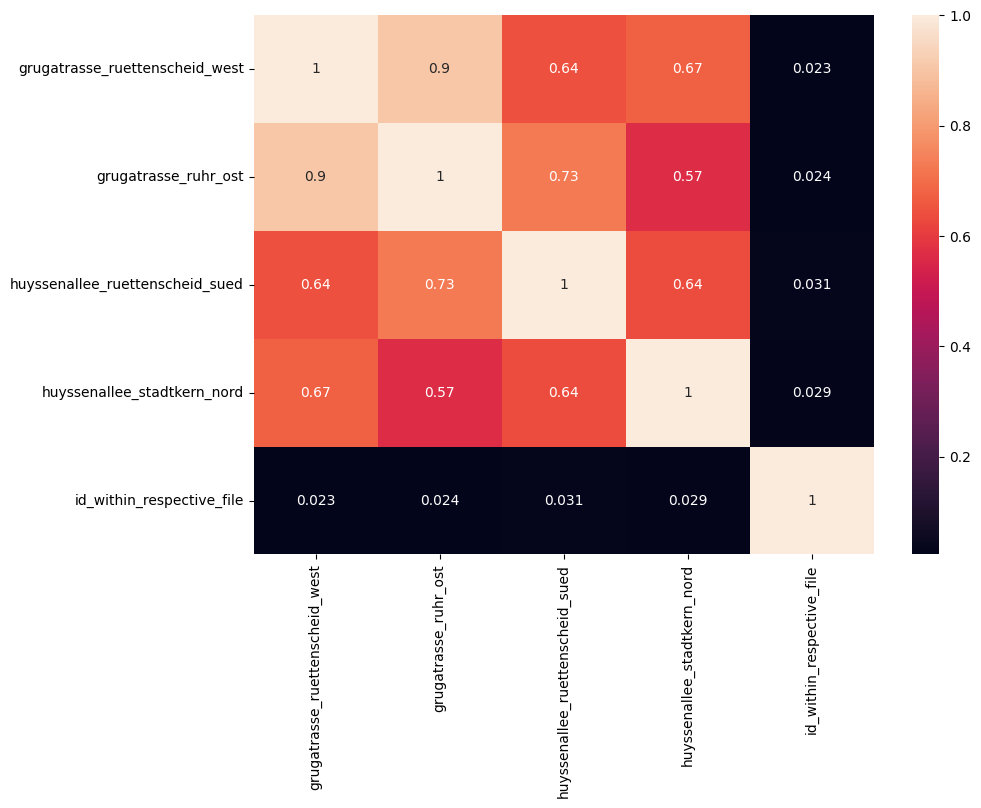

#EDA Correlation between streets

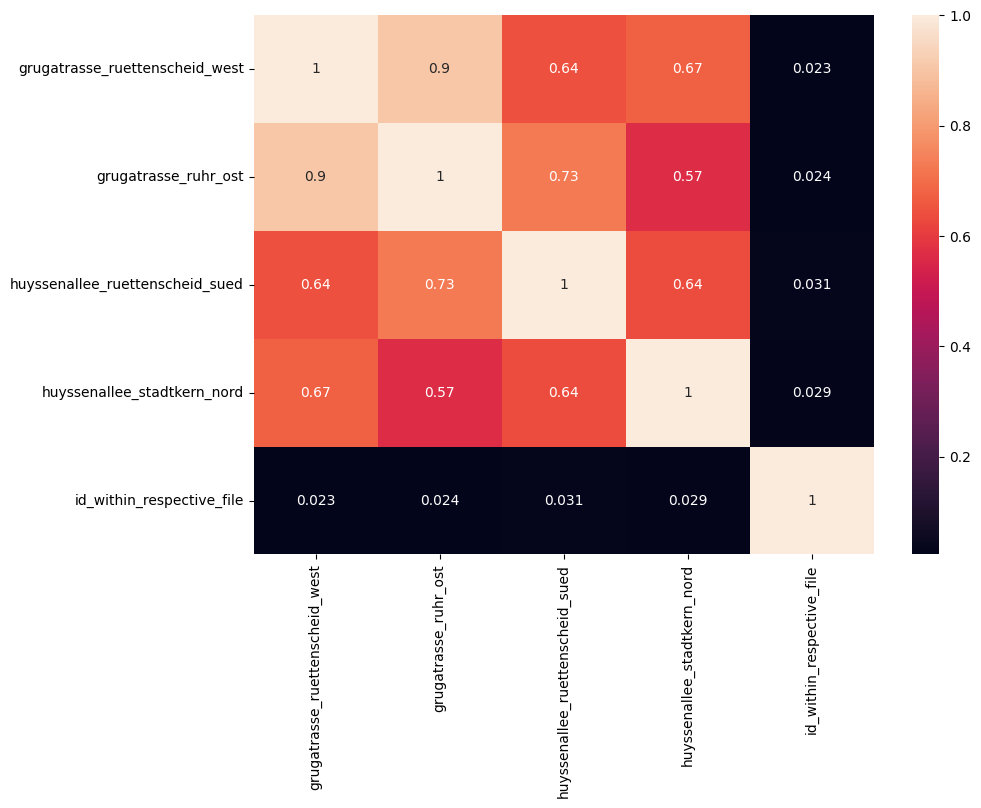

In [226]:
correlation_matrix = combined_df.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True)
plt.show()

#EDA 2

In [215]:
'''grid = sns.JointGrid(x = xx, y = yy)
grid.plot_joint(sns.scatterplot)

grid.ax_joint.plot(xx, y_pred, color='red', linewidth=3)
grid.ax_joint.set_xlabel("RM")
grid.ax_joint.set_ylabel("MEDV x1000")
grid.ax_joint.set_title("Simple Regression Model", y=1.2, fontsize = 16)
grid.ax_joint.set_xlim([0,9])
plt.show()'''

'grid = sns.JointGrid(x = xx, y = yy)\ngrid.plot_joint(sns.scatterplot)\n\ngrid.ax_joint.plot(xx, y_pred, color=\'red\', linewidth=3)\ngrid.ax_joint.set_xlabel("RM")\ngrid.ax_joint.set_ylabel("MEDV x1000")\ngrid.ax_joint.set_title("Simple Regression Model", y=1.2, fontsize = 16)\ngrid.ax_joint.set_xlim([0,9])\nplt.show()'

#EDA Weather Influence - Mean Temperature

Weather Data from : https://www.ecad.eu/utils/showselection.php?bp9bsi6cvo97munpu1kujok676

Used Data : sunshine and mean temperature.txt

sunshine : value sunshine in 0.1 Hours (prev name : TG)

mean temperature : value mean temperature in 0.1°C (prev name : SS)

In [216]:
mean_df = dataset_weather['mean temperature.txt']
sunshine_df = dataset_weather['sunshine.txt']

sunshine_df

,souid,date,value,quality_code,id_within_respective_file,filename
0,121976,1970-01-01,-9999,9,0,sunshine.txt
1,121976,1970-01-01,-9999,9,1,sunshine.txt
2,121976,1970-01-01,-9999,9,2,sunshine.txt
3,121976,1970-01-01,-9999,9,3,sunshine.txt
4,121976,1970-01-01,-9999,9,4,sunshine.txt
...,...,...,...,...,...,...
32441,121976,1970-01-01,0,0,32441,sunshine.txt
32442,121976,1970-01-01,13,0,32442,sunshine.txt
32443,121976,1970-01-01,9,0,32443,sunshine.txt
32444,121976,1970-01-01,21,0,32444,sunshine.txt
